In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import wrangle
import prepare
import explore

# Exercises I - Required
Our Telco scenario continues:

As a customer analyst for Telco, you want to know who has spent the most money with the company over their lifetime. You have monthly charges and tenure, so you think you will be able to use those two attributes as features to estimate total charges. You need to do this within an average of $5.00 per customer.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

Do your work in a notebook named explore.ipynb. In addition, you should create a file named explore.py that contains the following functions for exploring your variables (features & target).



- 1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

- 2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

- 3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

- 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

- 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

- 6. Explore your dataset with any other visualizations you think will be helpful.

- 7. In a seperate notebook, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.

## Acquire and Prepare Data

In [2]:
df = wrangle.wrangle_telco() # read in telco data using wrangle module

In [3]:
df.head() # take a look at the data

,customer_id,tenure,monthly_charges,total_charges,churn
5348,0040-HALCW,54,20.4,1090.60,No
5349,0042-RLHYP,69,19.7,1396.90,No
5350,0057-QBUQH,43,25.1,1070.15,No
5351,0064-SUDOG,12,20.3,224.50,No
5352,0071-NDAFP,25,25.5,630.60,No


In [4]:
df.info() # check for nulls and data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 5348 to 7042
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1685 non-null   object 
 1   tenure           1685 non-null   int64  
 2   monthly_charges  1685 non-null   float64
 3   total_charges    1685 non-null   float64
 4   churn            1685 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 79.0+ KB


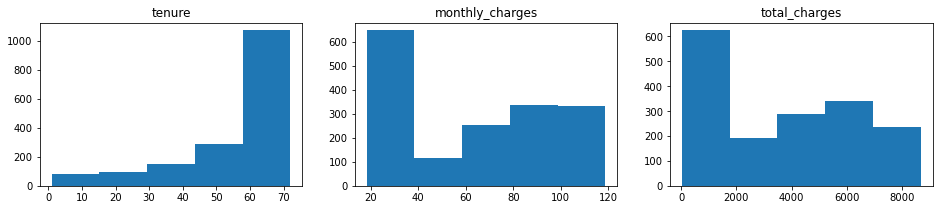

In [5]:
# this function plots the distributions of independent variables
explore.plot_univar(df, ['tenure', 'monthly_charges', 'total_charges'])

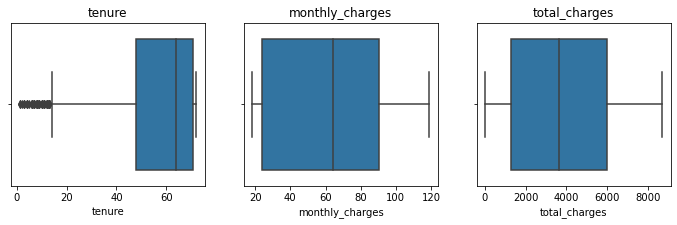

In [6]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['tenure', 'monthly_charges', 'total_charges']

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,4, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display boxplot for column.
    sns.boxplot(x=col, data=df)
    
    # Hide gridlines.
    plt.grid(False)

## Takeaways
- Tenure is highly skewed left
- Monthly charges and total charges are approaching normal

In [7]:
train, validate, test = prepare.prep_telco_data(df) # splitting our data

In [8]:
train.shape, validate.shape, test.shape

((943, 5), (405, 5), (337, 5))

In [9]:
train, validate, test = prepare.scale_telco_data(train, validate, test)

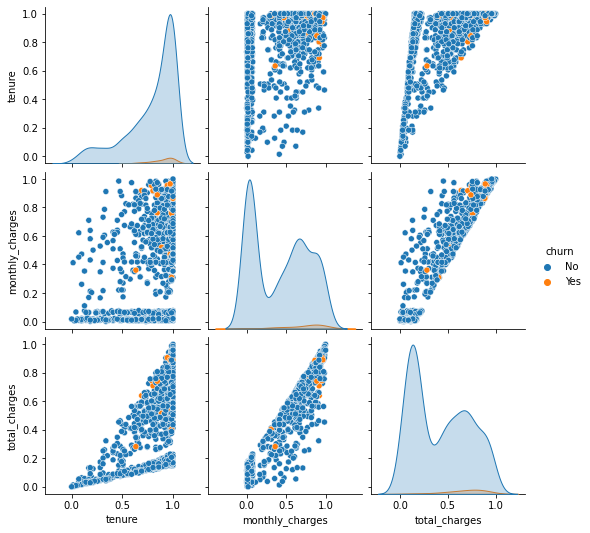

In [10]:
explore.plot_variable_pairs(train, "churn")

In [11]:
train = explore.months_to_years(train)

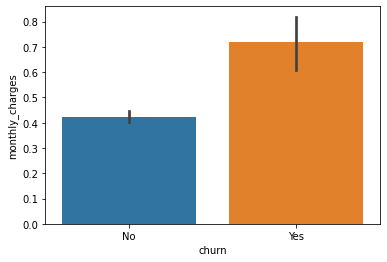

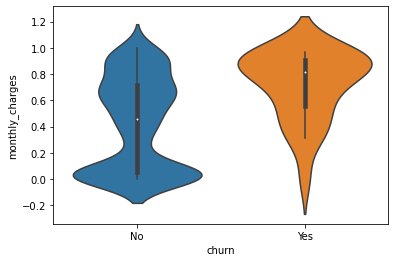

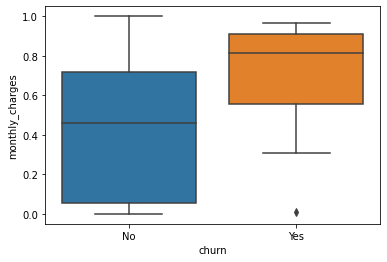

In [12]:
explore.plot_categorical_and_continuous_vars(train, train['churn'], train['monthly_charges'])

See mall_customers.ipynb for number 7.

# Exercises II - Challenge
Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

- 1. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

- 2. Come up with some initial hypotheses based on your goal of predicting property value.

- 3. Visualize all combinations of variables in some way.

- 4. Run the appropriate statistical tests where needed.

- 5. What independent variables are correlated with the dependent variable, home value?

- 6. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

- 7. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.